# Географические данные - библиотека Basemap
Если кратко - ну её нахрен, есть либы лучше и сейчас мне они не нужны. Станут нужны - гугол и стак оверфлоу.

# Глава 15. Seaborn

MPL имеет пару проблем - API очень лоу лвл, что вынуждает писать стены кода для реализации графически сложных и сильно кастомизированных графиков; А т.к. МПЛ старше пандаса на 10+ лет то он хреново работает с DataFrame (нужно каждый раз извлекать Series и часто использовать .concat() чтоб получить формат данных который примет МПЛ.

Решение проблем - Seaborn, "надстройка" МПЛ, упрощающий работу с графиками.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

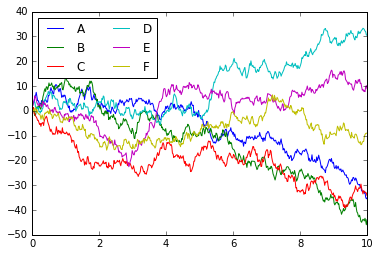

In [2]:
# пример с обычным мпл

# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0) # Return the cumulative sum of the elements along a given axis.

# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

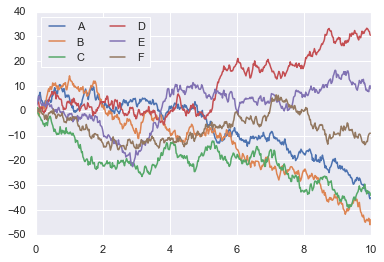

In [3]:
# а вот что будет при использовании Seaborn

import seaborn as sns
sns.set()

# выводим тот же график с теми же настройками (и SEABORNовским пресетом)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

# выглядит горааааааааздо лучше

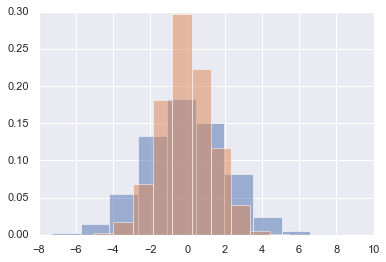

In [4]:
# вот так выглядит создание гистрограмы с мпл (со стилем от seaborn)

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

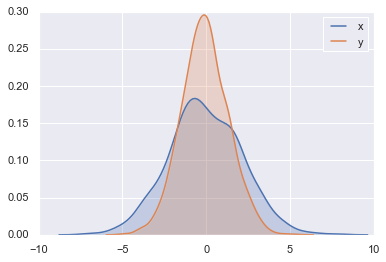

In [5]:
# seaborn умеет делать гладное представление этих данных
# KDE - kernel density estimation
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

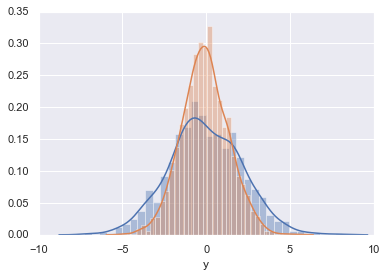

In [6]:
# можно вывести и гистограму и КДЕ с помошью sns.distplot()
sns.distplot(data['x'])
sns.distplot(data['y']);

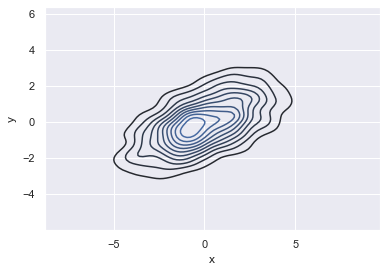

In [7]:
# вывод двумерного графика (передаем методу .kdeplot() данные по двум осям)
# а если передадим данные по одной оси то получим КДЕ, и все это в ОДНОМ методе
# Удобно)
sns.kdeplot(data['x'], data['y']);

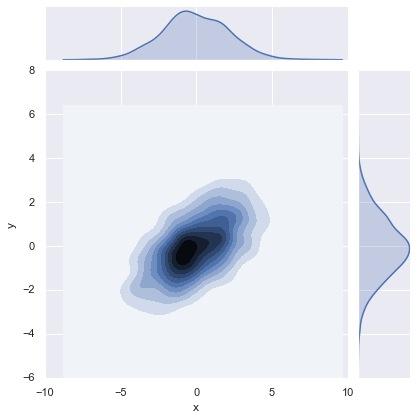

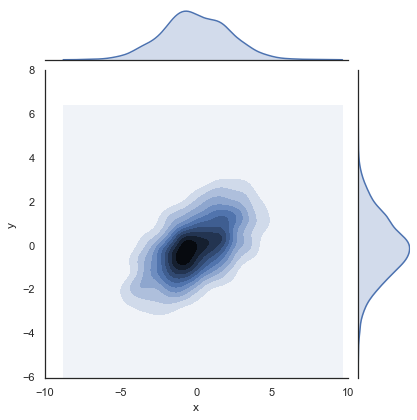

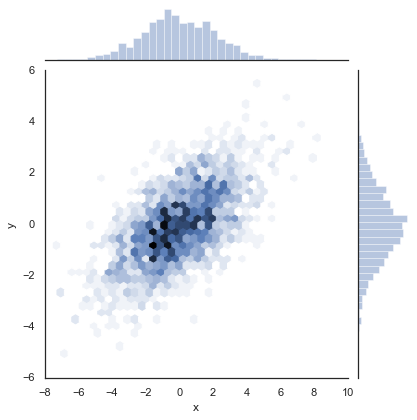

In [8]:
# помнишь стену кода которая была нужна для выведения 2х дополнительных
# графиков для двумерного графика в мпл?
# а в seaborn это делается одной строкой:

sns.jointplot("x", "y", data, kind='kde');

# и если хотим сделать фон белым:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');
    
# хотим хексагональную гистограмму? меняем агрумент kind на 'hex'
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex');

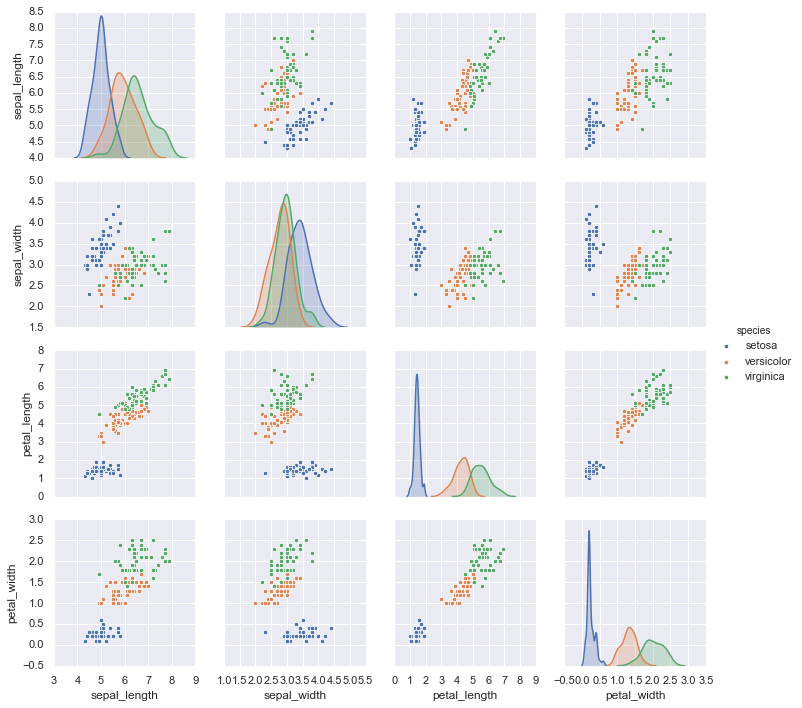

In [9]:
# если хотим сразу несколько .joinplot() то есть .pairplot()
# чтоб понять что на графиках - смотри подписи осей

iris = sns.load_dataset("iris")

sns.pairplot(iris, hue='species', height=2.5);

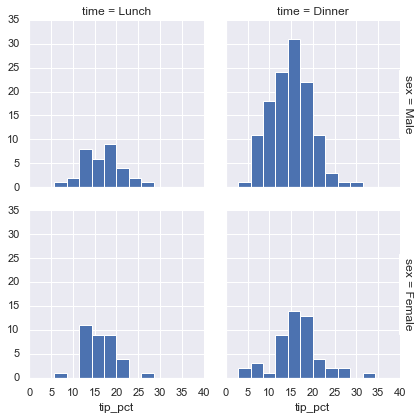

In [10]:
# Faceting is used when we’d like to split a particular visualization of
# variables by another variable. This will create multiple copies of the same
# type of plot with matching x and y axes, but whose content will differ.

tips = sns.load_dataset('tips')

tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

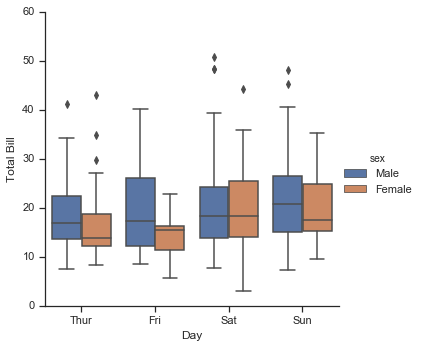

In [11]:
# для похожего результата визуализации ещё можно использовать catplot:
# этот медот даёт несколько иное представление данных (однако суть аналогична
# sns.FacetGrid())

with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

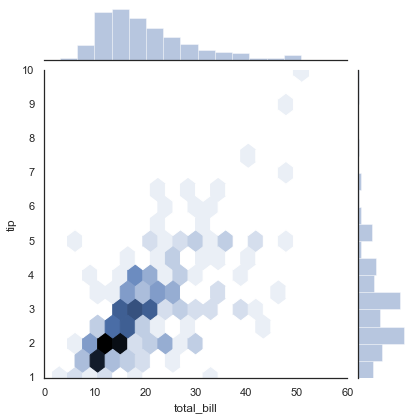

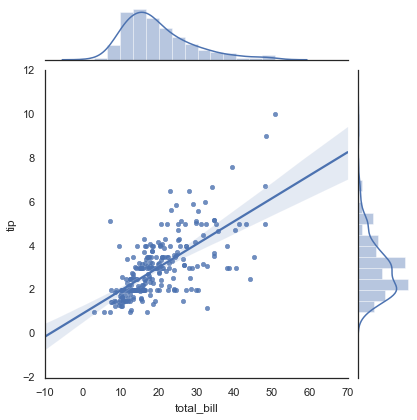

In [12]:
# Similar to the pairplot we saw earlier, we can use sns.jointplot to show
# the  joint distribution (взаимное распределение, показывает наличие/отсутствие
# связи между данными) between different datasets, along with
# the associated marginal distributions

with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')
    
    # у jointplot даже есть kernel density estimation and regression
    sns.jointplot("total_bill", "tip", data=tips, kind='reg');

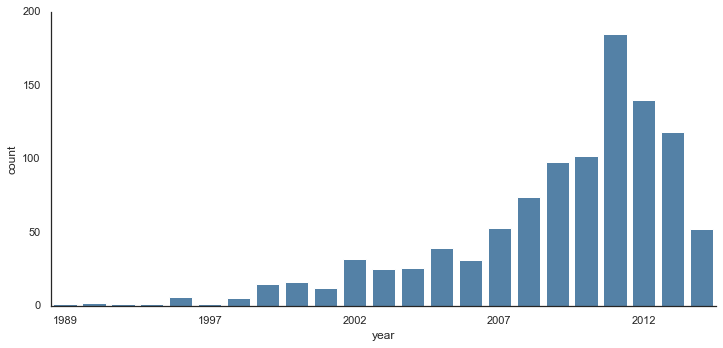

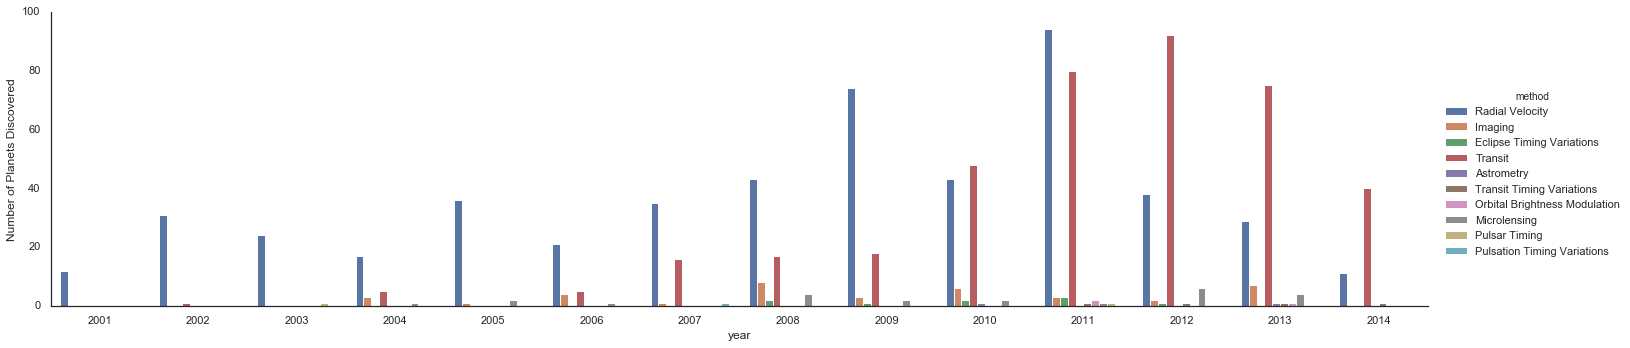

In [13]:
# для визуализации временных данных можно использовать sns.catplot()

planets = sns.load_dataset('planets')

with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

# выведем данные по "методу обнаружения планет" и годам обнаружения
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

# Пример построения графиков для анализа данных результатов марафона

In [25]:
data = pd.read_csv('D:/Stuff on HDD/My stuff/ML DS/Data_folder/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [26]:
# по умолчанию пандас прочитал время как питоновские строки

data.dtypes
# а для работы с этими данными нам нужны данные типа "время"

age        int64
gender    object
split     object
final     object
dtype: object

In [28]:
# пофиксим это преобразованием строки с объект timedelta64

# запомни этот код, он тебе еще пригодится
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.Timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('D:/Stuff on HDD/My stuff/ML DS/Data_folder/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [29]:
# для удобства визуализации добавим столбцы с секундами

# два способа перевода datetime64 в секунды, юзай первый, он выглядит читаемей
data['split_sec'] = data['split'].dt.total_seconds()
data['final_sec'] = data['final'] / np.timedelta64(1, 's')
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


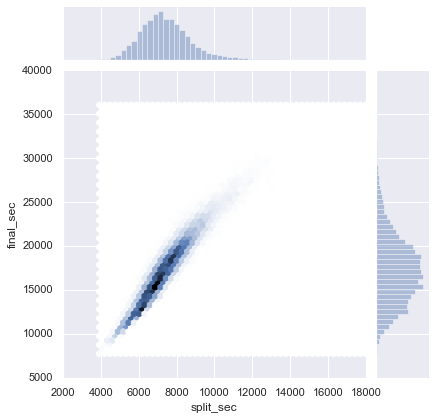

In [30]:
# выведем на экран joinplot чтобы понять как распределенны данные
fig = sns.jointplot('split_sec', 'final_sec', data, kind='hex')

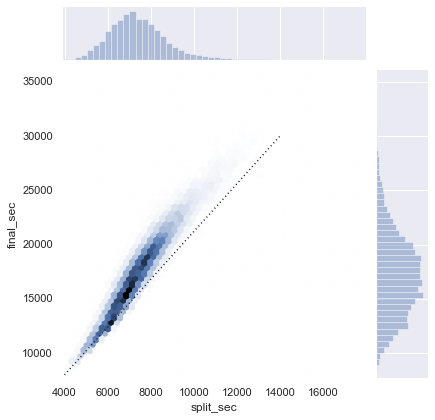

In [31]:
# добавим линию под 45 градусов чтобы посмотреть бегут ли люди быстрее на первой,
# или на второй части марафона (или они бегут с одинаковой скорсотью?)

# .ax_joint.plot позволяет рисовать поверх графика
fig = sns.jointplot("split_sec", "final_sec", data, kind='hex')
fig.ax_joint.plot(np.linspace(4000, 14000),
                  np.linspace(8000, 30000), ':k'); # ':k' - черный пунктир

# если маркер лежит прямо на нашей линии - человек бежал с одинаковой скоростью
# однако большинство маркеров находятся выше линии - т.е. большинство людей
# бежало вторую часть марафона медленнее

In [32]:
# посчитаем split_fraction, which measures the degree to which each
# runner negative-splits or positive-splits the race
# число больше 0 - бежал медленне во второй половине
# число меньше 0 - бежал быстрее во второй половине
data['split_fraction'] = 1 - 2 * data['split_sec'] / data['final_sec']

# смотрим что получилось, и заодно сортируем бегунов по финальному результату
data.sort_values('final_sec').head()

,age,gender,split,final,split_sec,final_sec,split_fraction
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


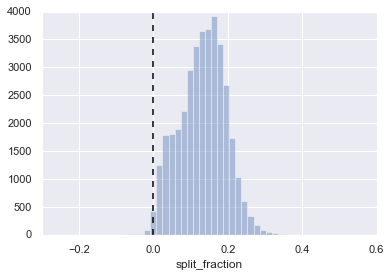

In [33]:
# выведем гистограму по split_fraction, отключив кде. И обозначив линию нуля
# sns.distplot - то же самое что plt.hist, только с кде и в seaborn

sns.distplot(data['split_fraction'], kde=False)
plt.axvline(x=0, color='Black', linestyle='--');
# plt.axvline рисует вертикальную линию на графике

# видим, что "отрицательных" ребят, которые бежали быстрее во второй половине
# очень мало

In [34]:
# посчитаем сколько людей как пробежало
positive_spl_frac = sum(data['split_fraction'] > 0)
negative_spl_frac = sum(data['split_fraction'] < 0)
print('positive_spl_frac = ',positive_spl_frac, '\n',
      'negative_spl_frac = ',negative_spl_frac,)

positive_spl_frac =  36995 
 negative_spl_frac =  251


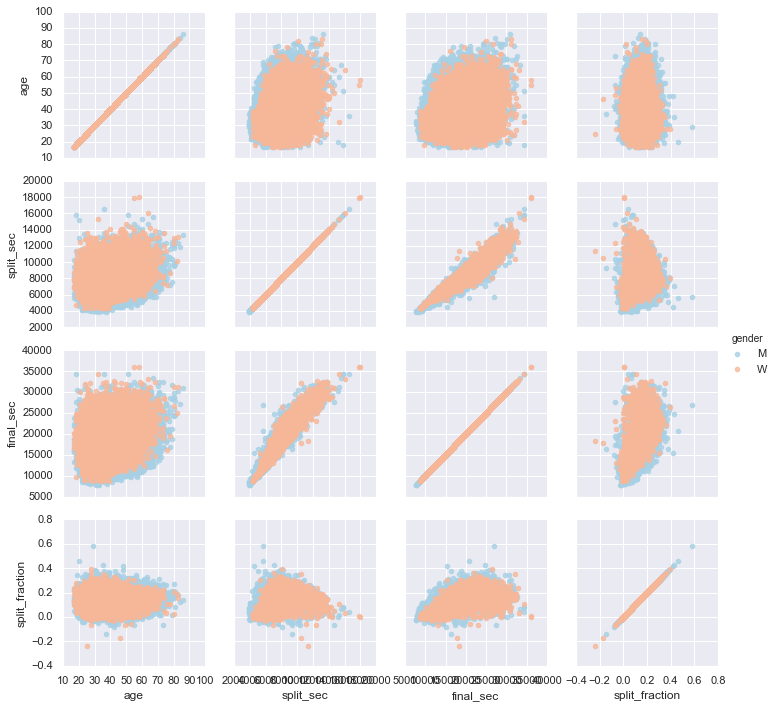

In [35]:
# поищем корреляцию между split_fraction и другими данными
# PairGrid - Subplot grid for plotting pairwise relationships in a dataset

# эта строка рисует сетку для наших графиков
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_fraction'],
                 hue='gender', palette='RdBu_r')

# эта строка рисует сами графики
g.map(plt.scatter, alpha=0.8)
g.add_legend(); # добавили легенду

# можно видить что корреляции split_fraction с возрастом нет, однако есть
# корреляция с промежуточным и финальным временем - т.е., предположительно,
# более быстрые бегуны имеют малый split_fraction 

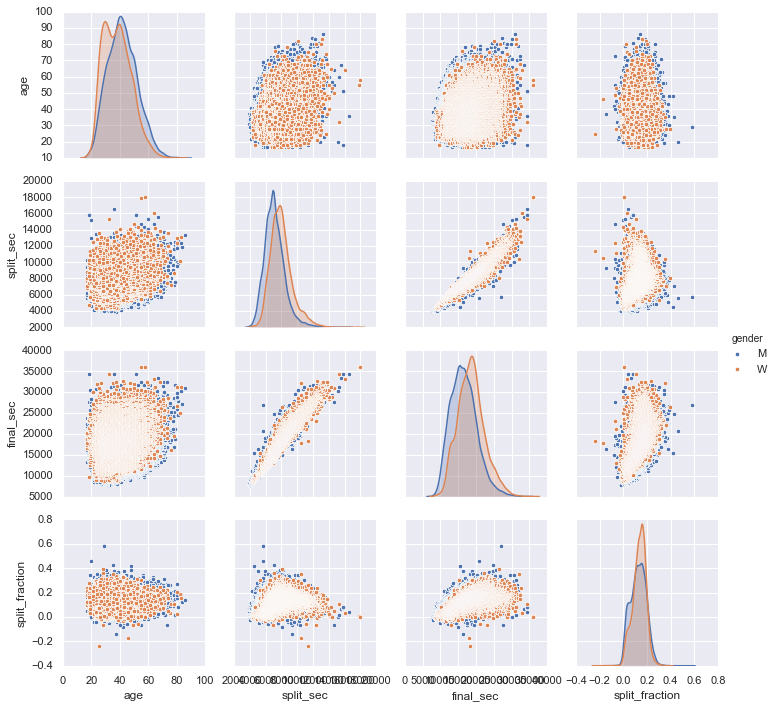

In [36]:
# то же самое можно сделать и с помошью sns.pairplot()
sns.pairplot(data, hue='gender', height=2.5);

# код получается короче, однако при использовании sns.PairGrid() +
# .map(plt.scatter) у нас есть возможность выбора столбцов для визуалиции
# в данном конкретном случае результат один, однако если бы нам нужны были
# определенные столбцы то нужно было бы использовать PairGrid + map

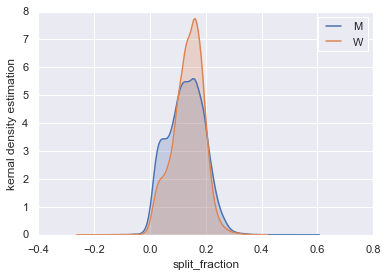

In [37]:
# минутка сексизма - сравним split_fraction у М и Ж

# data['split_fraction'][data['gender']=='M'] - взять значения из столбца
# split_fraction, у которых значение в столбце gender == М или W
sns.kdeplot(data['split_fraction'][data['gender']=='M'], label='M', shade=True)
sns.kdeplot(data['split_fraction'][data['gender']=='W'], label='W', shade=True);
plt.ylabel('kernal density estimation')
plt.xlabel('split_fraction');

# можно увидеть, что гораздо больше мужчин бегут ближе к 0 по split_fraction
# попытаемся разобрать почему...

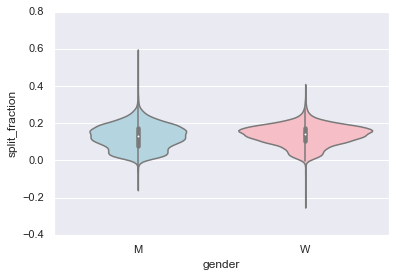

In [38]:
# сравним М и Ж по violinplot

sns.violinplot("gender", "split_fraction", data=data,
               palette=["lightblue", "lightpink"]);

# снова видим что Ж около 0 меньше чем М и что Ж больше в районе 0.1-0.2

In [39]:
# нырнем глубже и сравним violinplot разбив всех людей по возрастам

# для этого добавим колонку с декадами для каждого человека
data['age_dec'] = data['age'].map(lambda age: 10 * (age // 10))

# lambda - создаёт "временную" функцию для какой-то одной задачи
# здесь: lambda - слово "инициализатор" функции
# age - аргумент (у нас один, а можно задавать и несколько)
# "10 * (age // 10)" - тело функции, т.е. то что она делает

data.head()

,age,gender,split,final,split_sec,final_sec,split_fraction,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


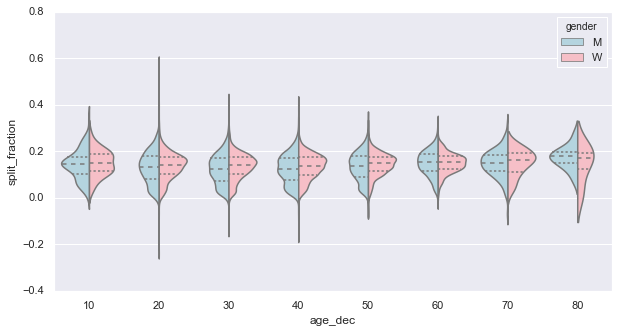

In [40]:
# составим violinplot для М и Ж с делением по возрастам

# plt.figure(figsize=(длина, ширина)) - задание размера фигуры
plt.figure(figsize=(10, 5))

sns.violinplot(x='age_dec', y='split_fraction', hue='gender', data=data,
               inner='quartile', palette=['lightblue', 'lightpink'],
               split=True);

# split - разделение "половинок"
# inner - что показывается внутри "половинок", у нас сейчас квартили
# x, y - какие данные по осям Х и У
# hue - какие данные по "половинкам"

# видим, что до 50ти лет М бегут ближе к 0, после 50 все более-менее равны, 
# как, кстати, и до 10ти лет
# интересно что Ж 80ти лет ну очень жоские, скорее всего это связанно с тем, что
# у нас относительно небольная выборка бегунов (и в их число затясалась парочка
# реактивных бабусек)

In [41]:
# быстро проверим эту "теорию нескольких реактивных старушек"

# подсчет бегунов за 80
print(sum(data['age'] > 80), '\n')

# поиск бабулек за 80 (и вывод их split_fraction)
print(data.loc[(data['gender']=='W') & (data['age'] > 80), ['age', 'gender',
                                                     'split_fraction']], '\n')

# поиск дедулек за 80 (и вывод их split_fraction)
print(data.loc[(data['gender']=='M') & (data['age'] > 80), ['age', 'gender',
                                                     'split_fraction']])

7 

       age gender  split_fraction
35915   82      W        0.189282
37214   83      W        0.156521 

       age gender  split_fraction
35695   81      M        0.206925
36766   84      M        0.125382
36916   81      M        0.078465
37179   83      M        0.184142
37207   86      M        0.140511


2.7777777777777777 
 4.166666666666667


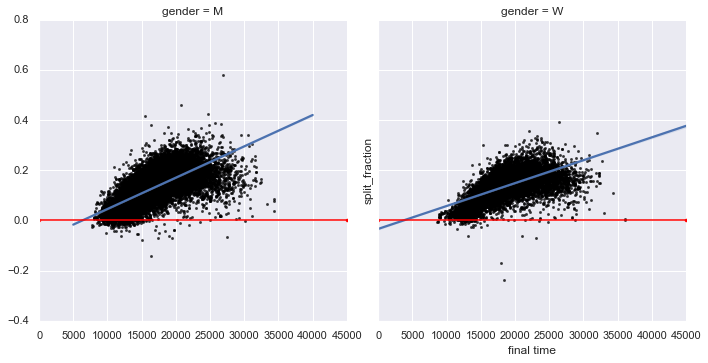

In [42]:
# теперь попытаемся понять кто у нас бежал с отрицательным split_fraction и
# коррелирует ли split_fraction с final_sec

# sns.lmplot выводит данные на экран и сразу применяет к ним линейную регрессию
# This function combines :func:`regplot` and :class:`FacetGrid`. It is
# intended as a convenient interface to fit regression models across
# conditional subsets of a dataset.

g = sns.lmplot('final_sec', 'split_fraction', col='gender', data=data,
               markers=".", scatter_kws=dict(color='black'))
g.map(plt.axhline, y=0, color="red", ls="-")
plt.ylabel('split_fraction')
plt.xlabel('final time');

# видим, что большинство бегунов с околонулевым, нулевым и отрицательным
# split_fraction имеют довольно малое итоговое время (около 10-15 тысяч секунд)

print(10000 / (60 * 60), '\n', 15000 / (60 * 60))

# т.е. около 3-4х часов, это быстро.
# делаем вывод, что ребята с такими малыми (и отрицательными) split_fraction
# это опытные бегуны, которые могУт.
# те же, кто имеют более крупные split_fraction как правило являются и более
# медленными.